In [148]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [149]:
with MPRester("aDcnN2LIF5TzWj3wL") as m:
    structbande = m.get_bandstructure_by_material_id("mp-4886")

# Structure de bande

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

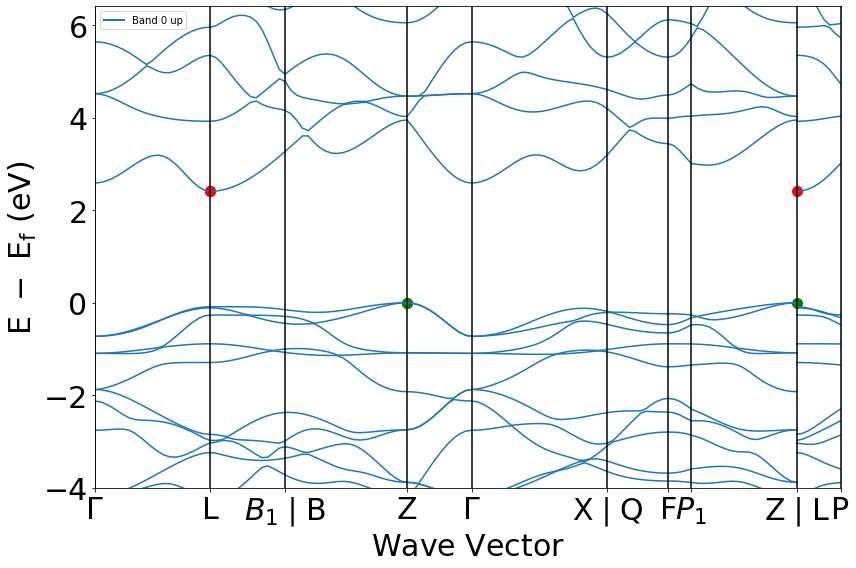

In [150]:
bsplot = BSPlotter(structbande)
bsplot.get_plot(vbm_cbm_marker=True)

# Détermination bande interdite

In [151]:
bandgap = structbande.get_band_gap()
energy = bandgap.get('energy')
direct = bandgap.get("direct")
transition = bandgap.get('transition')
print(" L'énergie de la bande interdite vaut {} eV \n Cette bande est : 'direct' = {} \n Le chemin pour la transition est {}".format(energy,direct,transition))

 L'énergie de la bande interdite vaut 2.4114999999999998 eV 
 Cette bande est : 'direct' = False 
 Le chemin pour la transition est Z-L


Nous obtenons que la bande interdite est indirect, ce qui se vérifie bien sur la graphe ci-dessus. La transition nous indique le chemin le plus court dans la bande interdite.

# Détermination de la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion

In [152]:
data = bsplot.bs_plot_data()
energ = data.get('energy')
coord = data.get('ticks').get('distance')
coord = [coord[0],coord[1],coord[3],coord[4],coord[6],coord[8],coord[9],coord[11],coord[13],coord[14]]

Vindex = 19
Cindex = 20

penteV = np.zeros(9)
penteC = np.zeros(9)

for i in range(9):
    dist = coord[i+1] - coord[i]
    penteV[i] = abs(((energ.get('1')[i][Vindex])[-1] - (energ.get('1')[i][Vindex])[0])/(dist))
    penteC[i] = abs(((energ.get('1')[i][Cindex])[-1] - (energ.get('1')[i][Cindex])[0])/(dist))
    
maxV = np.max(penteV)
minV = np.min(penteV)
maxC = np.max(penteC)
minC = np.min(penteC)  

IdmaxV = (np.where(penteV==maxV))[0][0]
IdminV = (np.where(penteV==minV))[0][0]
IdmaxC = (np.where(penteC==maxC))[0][0]
IdminC = (np.where(penteC==minC))[0][0]

print("Pour la dernière bande de valence, la plus grande dispersion vaut {} et a lieu sur la branche Z-Gamma,  représentée en bleu dans le graphe ci-dessous".format(maxV))
print("Pour la dernière bande de valence, la plus faible dispersion vaut {} et a lieu sur la branche X|Q-F,  représentée en rouge dans le graphe ci-dessous".format(minV))
print("Pour la première bande de condction, la plus grande dispersion vaut {} et a lieu sur la branche Z-Gamma,  représentée en jaune dans le graphe ci-dessous".format(maxC))
print("Pour la première bande de condction, la plus faible dispersion vaut {} et a lieu sur la branche Gamma-L, représentée en vert dans le graphe ci-dessous".format(minC))

Pour la dernière bande de valence, la plus grande dispersion vaut 1.3219195911624257 et a lieu sur la branche Z-Gamma,  représentée en bleu dans le graphe ci-dessous
Pour la dernière bande de valence, la plus faible dispersion vaut 0.09665741161392738 et a lieu sur la branche X|Q-F,  représentée en rouge dans le graphe ci-dessous
Pour la première bande de condction, la plus grande dispersion vaut 2.4851140701243466 et a lieu sur la branche Z-Gamma,  représentée en jaune dans le graphe ci-dessous
Pour la première bande de condction, la plus faible dispersion vaut 0.18270204221734987 et a lieu sur la branche Gamma-L, représentée en vert dans le graphe ci-dessous


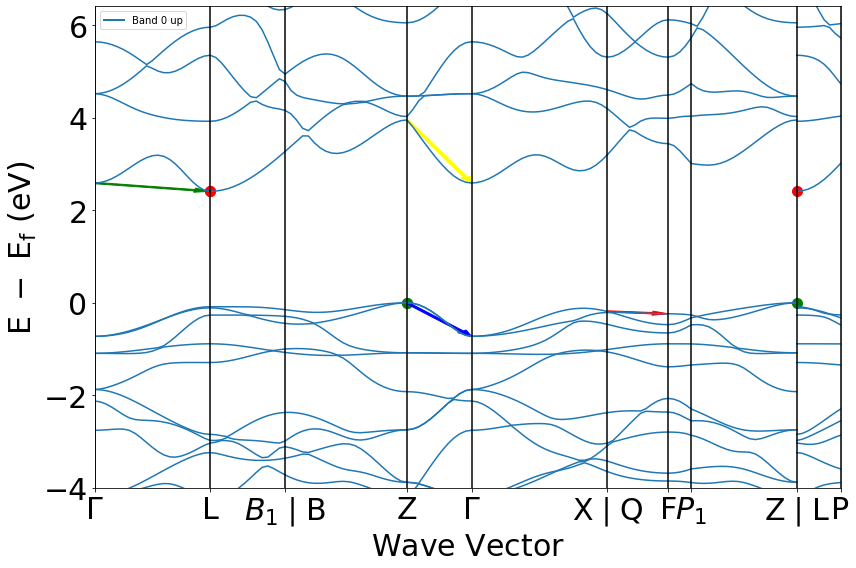

In [153]:
bsplot.get_plot(vbm_cbm_marker=True)
plt.arrow(coord[IdmaxV], (energ.get('1')[IdmaxV][Vindex])[0],coord[IdmaxV+1] - coord[IdmaxV], 
              (energ.get('1')[IdmaxV][Vindex])[-1] - (energ.get('1')[IdmaxV][Vindex])[0], width = 0.03,length_includes_head=True,color='blue')
plt.arrow(coord[IdminV], (energ.get('1')[IdminV][Vindex])[0],coord[IdminV+1] - coord[IdminV], 
              (energ.get('1')[IdminV][Vindex])[-1] - (energ.get('1')[IdminV][Vindex])[0], width = 0.03,length_includes_head=True,color='red')
plt.arrow(coord[IdmaxC], (energ.get('1')[IdmaxC][Cindex])[0],coord[IdmaxC+1] - coord[IdmaxC], 
              (energ.get('1')[IdmaxC][Cindex])[-1] - (energ.get('1')[IdmaxC][Cindex])[0], width = 0.03,length_includes_head=True,color='yellow')
plt.arrow(coord[IdminC], (energ.get('1')[IdminC][Cindex])[0],coord[IdminC+1] - coord[IdminC], 
              (energ.get('1')[IdminC][Cindex])[-1] - (energ.get('1')[IdminC][Cindex])[0], width = 0.03,length_includes_head=True,color='green')
plt.show()

Pour calculer la masse effective, nos utilisons la formule suivante :$$m^* = \hbar^2\left(\frac{\partial^2E(k)}{\partial k^2}\right)^{-1} ,$$où E(k) est l'énergie d'un électron dont le vecteur d'onde est k et $\hbar$ qui est la constante de Dirac. Nous supposons que E(k) a une dispersion parabolique. 

# Détermination de la masse effective au sommet de la dernière bande de valence

In [154]:
x1, y1 = coord[3], energ.get('1')[3][Vindex][0] 
x2, y2 = coord[2], energ.get('1')[2][Vindex][0]  

print("point 1 : ({}, {})".format(x1,y1))
print("point 2 : ({}, {})".format(x2,y2),"\n")

a = (y2-y1)/(x2-x1)**2
print("Equation parabole E(k) = {}(k-{})^2 + {}".format(a,x1,y1),"\n")

ddEddk = 2*a * 10**(-20) * 1.602176634*10**(-19) 
hbar = 1.054571817*10**(-34) 

print("La masse effective: m* = {} kg".format(hbar**2/ddEddk))

point 1 : (2.6544163219655426, 0.0)
point 2 : (1.6198343758169966, -0.1493) 

Equation parabole E(k) = -0.13948580611882402(k-2.6544163219655426)^2 + 0.0 

La masse effective: m* = -2.4881806912892063e-29 kg


# Détermination de la masse effective à la base de la première bande de conduction

In [155]:
x3, y3 = coord[1], energ.get('1')[1][Cindex][0] 
x4, y4 = coord[0], energ.get('1')[0][Cindex][0] 

print("point 1 : ({}, {})".format(x3,y3))
print("point 2 : ({}, {})".format(x4,y4),"\n")

a = (y4-y3)/(x4-x3)**2
print("Equation parabole E(k) = {}(k-{})^2 + {}".format(a,x3,y3),"\n")

ddEddk = 2*a * 10**(-20) * 1.602176634*10**(-19) 
hbar = 1.054571817*10**(-34) 

print("La masse effective: m* = {} kg".format(hbar**2/ddEddk))

point 1 : (0.9824739659256759, 2.4114999999999998)
point 2 : (0.0, 2.5909999999999997) 

Equation parabole E(k) = 0.18596120462612975(k-0.9824739659256759)^2 + 2.4114999999999998 

La masse effective: m* = 1.8663349174981675e-29 kg


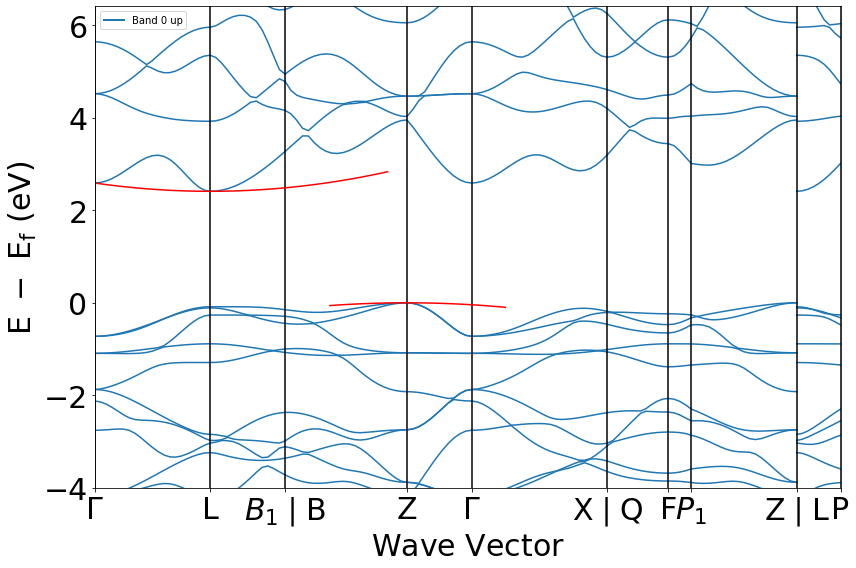

In [156]:
# équation parabole : f(k) = mV*(k-pV)**2
mV = y2/(x2-x1)**2
pV = x1

def fV(x):
    return mV*(x-pV)**2

xV = np.arange(2,3.5,0.01)
yV = fV(xV)

# équation parabole : f(k) = mC*(k-pC)^2 + y3
mC = (y4-y3)/(x4-x3)**2
pC = x3

def fC(x):
    return mC*(x-pC)**2 + y3

xC = np.arange(-1,2.5,0.01)
yC = fC(xC)

bsplot.get_plot()
plt.plot(xC,yC,color ='r')
plt.plot(xV,yV,color = 'r')